In [35]:
from __future__ import print_function

import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1337)  # for reproducibility

# input image dimensions
img_rows, img_cols = 128, 128

WB=sio.loadmat('sandstone_data.mat')['Data']
Y_data = sio.loadmat('sandstone_data.mat')['L']
Y_data = (Y_data-min(Y_data))/(max(Y_data)-min(Y_data))
X_data = np.reshape(WB,(768,img_rows*img_cols))
X_train = X_data[0:768];
Y_train = Y_data[0:768];

WB1 = sio.loadmat('test_sandstone_data.mat')['Data']
X_test = np.reshape(WB1, (240, img_rows*img_cols))
Y_test = sio.loadmat('test_sandstone_data.mat')['L']
Y_test = (Y_test-min(Y_test))/(max(Y_test) - min(Y_test))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (768, 16384)
768 train samples
240 test samples


In [51]:
#test all defferent kinds regression algorithms

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, SGDRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

0.0064713996138943261

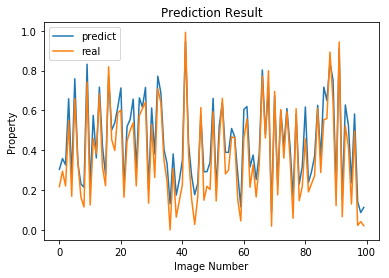

In [9]:
# Linear Regression

lire = LinearRegression()
lire.fit(X_train, Y_train)
pred = lire.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

'''
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
se = pred-Y_test
ax2.plot(x,se[0:100])
ax2.set_xlabel('Image Number')
ax2.set_ylabel('Difference')
'''

0.0064703667108559427

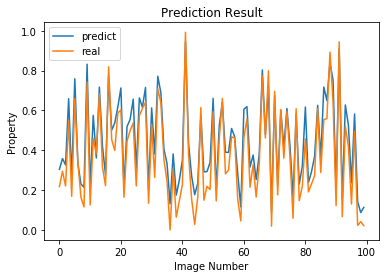

In [27]:
# RidgeCV: linear least squares with L2 regularization with bulit-in cross-validation
ridgecv = RidgeCV(alphas=(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5, 10), store_cv_values=True)
ridgecv.fit(X_train, Y_train)
pred = ridgecv.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

# ridgecv.cv_values_
# ridgecv.coef_
# ridgecv.alpha_

0.020113799499309613

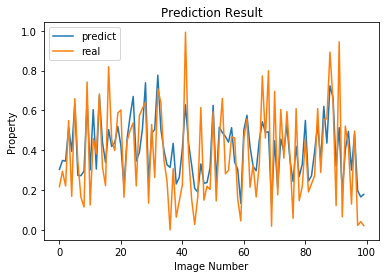

In [28]:
#LassoCV: linear model trained with L1 prior as regularizer with built-in cross-validation
lassocv = LassoCV(alphas=(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5, 10))
lassocv.fit(X_train, Y_train)
pred = lassocv.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

#lassocv.alpha_

In [42]:
#SGDRegressor: works for dense numpy arrays of floating point values, might not work for the current data since it's sparse
sgdreg = SGDRegressor(penalty='l2', alpha='0.005')
sgdreg.fit(X_train, Y_train)
pred = sgdreg.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

TypeError: a float is required

In [41]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)

0.014945250994800678

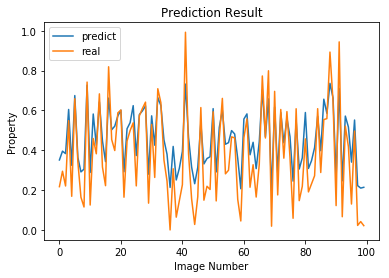

In [44]:
# SVR: epsilon-Support Vector Regression

svc = SVR()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.0069724034756546115

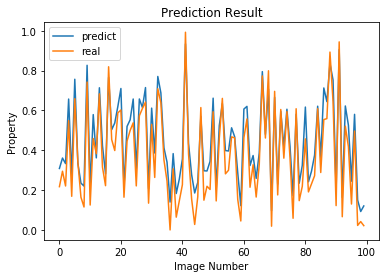

In [45]:
# LinearSVR: Linear Support Vector Regression

lisvr = LinearSVR()
lisvr.fit(X_train, Y_train)
pred = lisvr.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

/home/hechaoli/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0087626855785079439

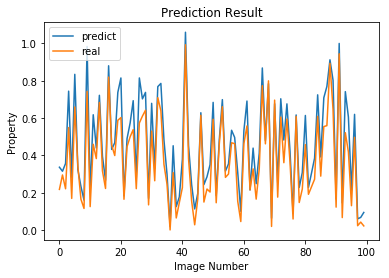

In [46]:
# MLPRegressor: Multi-layer Perceptron Regressor, optimizes the squared loss using LBFGS or SGD
mlpreg = MLPRegressor()
mlpreg.fit(X_train, Y_train)
pred = mlpreg.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.0087626855785079439

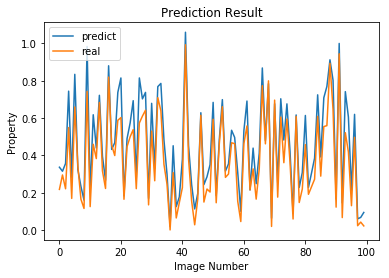

In [50]:
#KNeidgborsRegressor: K-nearest neidgbors
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
knn.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

In [54]:
#Decision Tree Regressor:
dtr = DecisionTreeRegressor()
#cross_val_score(dtr, X_train, Y_train, cv=10)

array([ 0.94464668,  0.83449494,  0.87363679,  0.91901003,  0.90532179,
        0.95674772,  0.94856438,  0.9352715 ,  0.85376306,  0.92183418])

0.078468112820153452

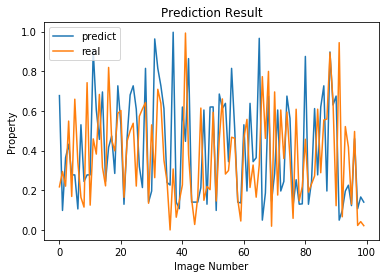

In [56]:
dtr.fit(X_train, Y_train)
pred = dtr.predict(X_test)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.034150536766500442

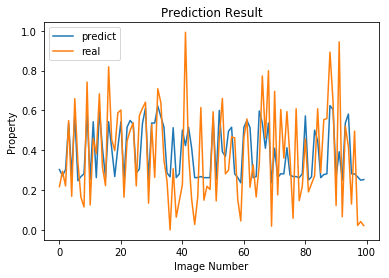

In [65]:
# AdaBoost Regressor
adaboost = AdaBoostRegressor(loss='square', learning_rate=0.7)
adaboost.fit(X_train, Y_train)
pred = adaboost.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.044046424807219521

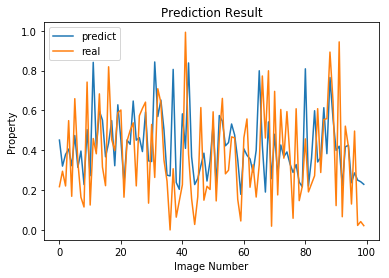

In [64]:
# Bagging Regressor:
bagging = BaggingRegressor(n_estimators=20)
bagging.fit(X_train, Y_train)
pred = bagging.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

0.02929254537178123

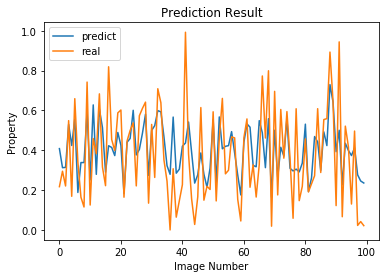

In [66]:
#Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(X_train, Y_train)
pred = gb.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

/home/hechaoli/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


0.038869471838365505

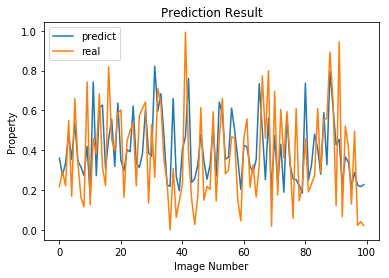

In [67]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
pred = rf.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)

/home/hechaoli/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


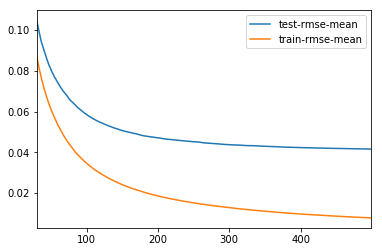

In [68]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = Y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)


model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

0.038869471838365505

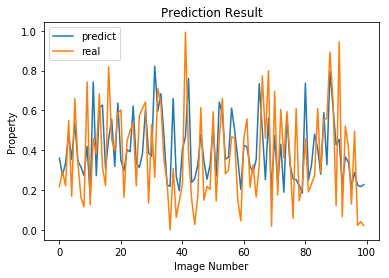

In [69]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, Y_train)
model_xgb.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x=[]
for i in range(100):
    x.append(i)

ax.plot(x,pred[0:100], label='predict')
ax.plot(x,Y_test[0:100],label='real')
plt.legend()
ax.set_title('Prediction Result')
ax.set_xlabel('Image Number')
ax.set_ylabel('Property')

mean_squared_error(Y_test, pred)